In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#Load cleaned data
data_path = r"C:\Users\richa\Documents\Ex_6\02 Data\CWurData_cleaned.csv"
df = pd.read_csv(data_path)

In [3]:
# columns
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [13]:
## data prep for Kmeans
# Select numeric columns
numeric_cols = ['score', 'quality_of_education', 'alumni_employment', 
                'quality_of_faculty', 'publications', 'influence', 
                'citations', 'broad_impact', 'patents']

X = df[numeric_cols].fillna(0)  # fill NaN with 0


In [14]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

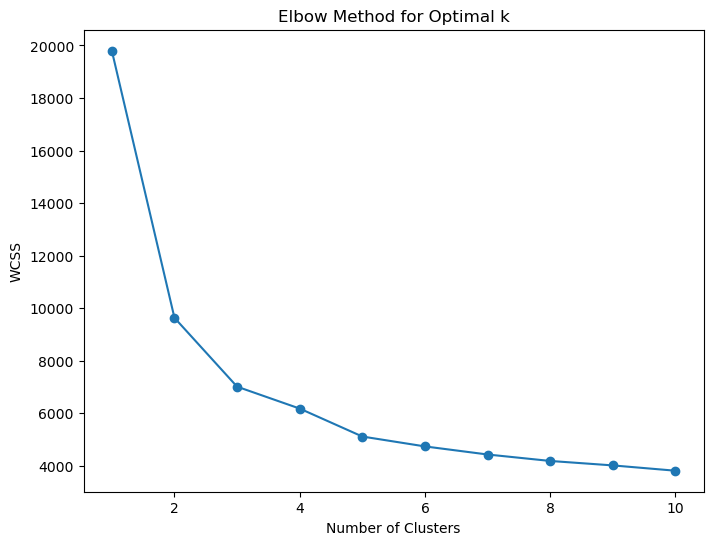

In [15]:
##Elbow Method to Find Number of Clusters
# Within-Cluster Sum of Squares
wcss = [] 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow chart
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#run k means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [17]:
# Add cluster labels to the dataframe
df['cluster'] = clusters
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,cluster
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,1
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,1
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,1


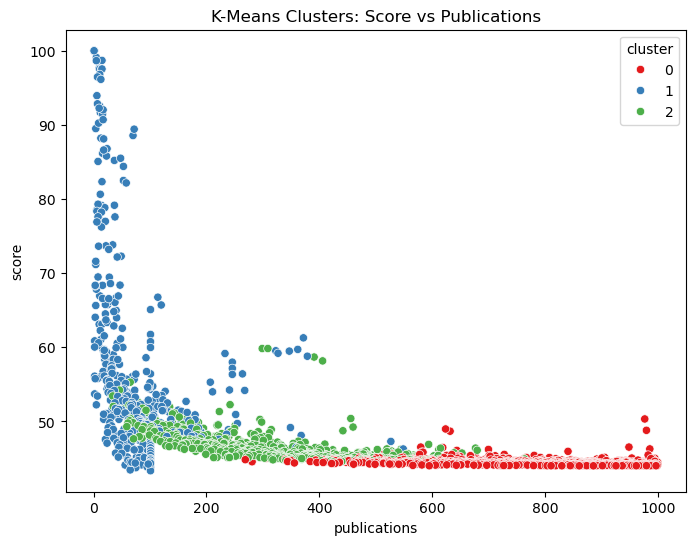

In [18]:
#cluster visualisation
#Score vs Publications
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='publications', y='score', hue='cluster', palette='Set1')
plt.title('K-Means Clusters: Score vs Publications')
plt.show()

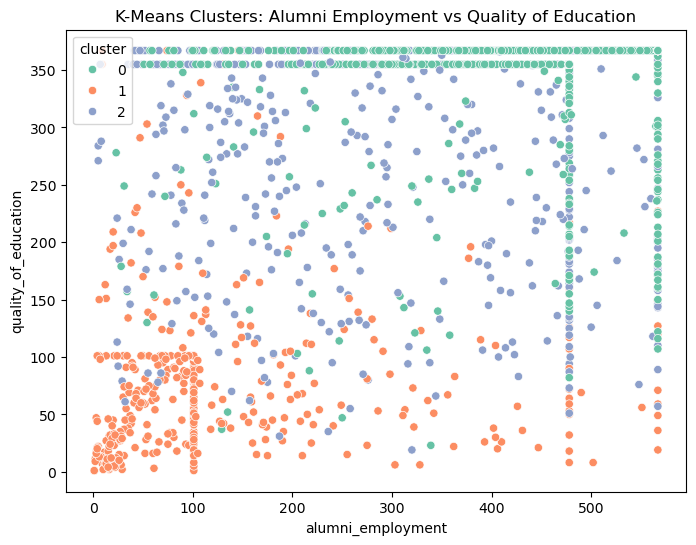

In [19]:
#Alumni Employment vs Quality of Education
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='alumni_employment', y='quality_of_education', hue='cluster', palette='Set2')
plt.title('K-Means Clusters: Alumni Employment vs Quality of Education')
plt.show()

In [20]:
#descriptive statistics
df.groupby('cluster')[numeric_cols].mean()

,score,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents
cluster,,,,,,,,,
0,44.516637,342.861933,456.896450,212.854043,736.246548,728.657791,639.060158,733.602564,612.359961
1,57.205000,80.248879,133.450673,67.937220,77.228700,70.452915,74.542601,89.353659,114.098655
2,46.625905,299.686486,355.195946,199.216216,311.893243,326.045946,308.466216,307.493243,380.460811


In [ ]:
#The scatter plots show that 
#Cluster 1 includes the top universities with the highest scores and best publication and employment ranks, 
#Cluster 2 contains mid-tier schools with moderate scores, and 
#Cluster 0 represents baseline universities with lower overall performance. 
#The table of average values confirms these patterns, showing clear differences in research output, education quality, 
#and alumni success across the clusters.

In [ ]:
#These clusters can help in future analytics:
#groups of universities with similar performance